<a href="https://colab.research.google.com/github/rana14ce/Dataset-of-the-Multinational-Pile/blob/v5/GitHub_XGBoost_with_5_fold_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CTRL+Shift+Space bar = docstring
# CTRL+Space bar = autocomplete

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
url = 'https://raw.githubusercontent.com/rana14ce/Dataset-of-the-Multinational-Pile/main/Dataset%20of%20the%20Multinational%20Pile.csv'
data = pd.read_csv(url)

In [4]:
data.head()

,Phi_s,Phi_t,L_m,A_m2,Sv _KN/m2,Qm_KN
0,33.0,38.0,255,24.5,0.1310,2615
1,34.0,37.5,206,19.8,0.2230,3675
2,33.0,38.0,223,21.5,0.1310,2164
3,33.0,37.5,210,20.2,0.1468,3042
4,33.0,37.0,206,19.9,0.1821,2856


In [5]:
X = data.drop('Qm_KN', axis=1)
y = data['Qm_KN']

In [6]:
# 2. Normalize inputs
# --------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 3. Train-test split (80/20, random)
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
# 5. Cross-validation (5-fold)
# --------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(xgb, X_train, y_train, cv=kf, scoring="r2")
print("5-Fold CV R²:", cv_r2)
print("Mean CV R²:", np.mean(cv_r2))

5-Fold CV R²: [ 0.57107329  0.51954508 -0.99614286  0.53854907  0.17664325]
Mean CV R²: 0.1619335651397705


In [11]:
# 6. Fit and evaluate
# --------------------------
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

def evaluate(y_true, y_pred, dataset="Train"):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    vaf = (1 - np.var(y_true - y_pred) / np.var(y_true)) * 100
    print(f"{dataset} -> R²={r2:.4f}, RMSE={rmse:.4f}, VAF={vaf:.2f}%")
    return r2, rmse, vaf

evaluate(y_train, y_pred_train, "Train")
evaluate(y_test, y_pred_test, "Test")

Train -> R²=1.0000, RMSE=4.4013, VAF=100.00%
Test -> R²=0.3878, RMSE=1077.4495, VAF=40.15%


(0.38775163888931274, np.float64(1077.4494767737372), 40.1489471720357)

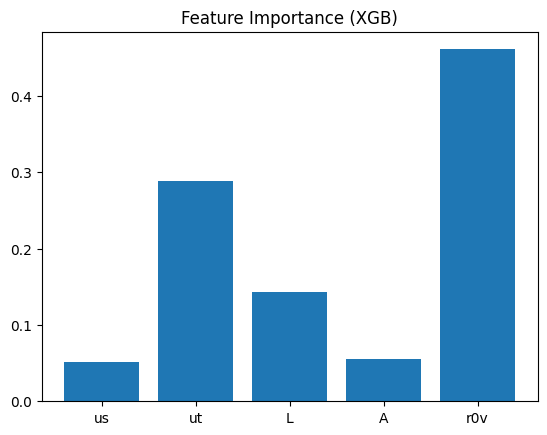

In [12]:
# 7. Variable importance
# --------------------------
importances = xgb.feature_importances_
features = ['us', 'ut', 'L', 'A', 'r0v']

plt.bar(features, importances)
plt.title("Feature Importance (XGB)")
plt.show()